In [48]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace
from pymoo.indicators.hv import HV
from pymoo.config import Config
Config.warnings['not_compiled'] = False



In [49]:
conf = !python  parameters.py

In [50]:
configs = eval(conf[0])

In [51]:
## Experiment config
configs.name="E1000v2"
configs.n_devices=999
configs.n_jobs=9

In [52]:
def getWeithDecomposition(val):
    print(val)
    if val[0]=="0":
        return "(0,1.)"
    elif val[0]=="1":
        return "(1.,0)"
    return "(%s,%s)"%(float(val[0:2])/100,float(val[2:])/100)

# DRL - average all samples

In [57]:
## previou eval_trained_PF_ppo.py
#df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
configs.name="E1000v9"
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_v3.pkl', 'infer')
df = pd.DataFrame(df)
df.head()


,0,1,2,3,4,5,6,7
0,1000,0,260.0,1716.0,-260.00,562.0,1620.0,0.690426
1,7525,0,305.0,624.0,-384.75,562.0,1620.0,0.690806
2,5050,0,527.0,176.0,-351.50,562.0,1620.0,0.688146
3,2575,0,1009.0,299.0,-476.50,562.0,1620.0,0.693997
4,0100,0,2450.0,279.0,-279.00,562.0,1620.0,0.687160


In [58]:

df.columns = ["model","sample","time","cost","reward","iTime","iCost","execTime"]
df

,model,sample,time,cost,reward,iTime,iCost,execTime
0,1000,0,260.0,1716.0,-260.00,562.0,1620.0,0.690426
1,7525,0,305.0,624.0,-384.75,562.0,1620.0,0.690806
2,5050,0,527.0,176.0,-351.50,562.0,1620.0,0.688146
3,2575,0,1009.0,299.0,-476.50,562.0,1620.0,0.693997
4,0100,0,2450.0,279.0,-279.00,562.0,1620.0,0.687160
...,...,...,...,...,...,...,...,...
495,1000,0,259.0,1554.0,-259.00,562.0,1620.0,0.684845
496,7525,0,269.0,608.0,-353.75,562.0,1620.0,0.683001
497,5050,0,507.0,164.0,-335.50,562.0,1620.0,0.688669
498,2575,0,826.0,328.0,-452.50,562.0,1620.0,0.681462


In [59]:
dfmodel = df.groupby("model").agg({"time":mean,"cost":mean,"iTime":mean,"iCost":mean,"execTime":mean})
dfmodel

,time,cost,iTime,iCost,execTime
model,,,,,
0100,2493.959961,257.200012,562.0,1620.0,0.686687
1000,259.500000,1630.010010,562.0,1620.0,0.686690
2575,976.690002,315.970001,562.0,1620.0,0.686415
5050,531.679993,183.229996,562.0,1620.0,0.686810
7525,292.160004,568.309998,562.0,1620.0,0.686533


In [60]:
print(type(dfmodel))


<class 'pandas.core.frame.DataFrame'>


In [61]:
for i in range(len(dfmodel)):
    print(dfmodel.iloc[i].name)
    print(dfmodel.iloc[i].time)
    

0100
2493.9599609375
1000
259.5
2575
976.6900024414062
5050
531.6799926757812
7525
292.1600036621094


0100
1000
2575
5050
7525


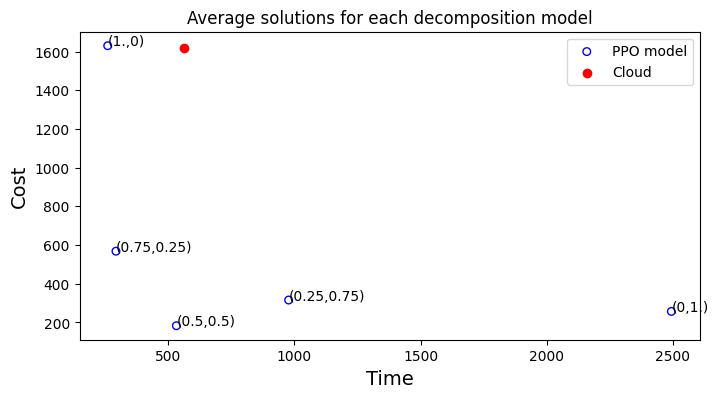

In [62]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dfmodel.time, dfmodel.cost, s=30, facecolors='none', edgecolors='blue',label="PPO model")

ax.scatter(dfmodel.iTime[0],dfmodel.iCost[0],color="red",label="Cloud")
for i in range(len(dfmodel)):
    ax.annotate(getWeithDecomposition(dfmodel.iloc[i].name), (dfmodel.iloc[i].time, dfmodel.iloc[i].cost))

plt.title("Average solutions for each decomposition model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
ax.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [26]:
avg_pf = np.vstack((dfmodel.time.values,dfmodel.cost.values)).T
avg_pf.shape

(5, 2)

In [27]:
avg_pf

array([[2668.8    ,  269.73334],
       [ 259.06668, 1644.3667 ],
       [1142.6666 ,  338.66666],
       [ 364.46667,  222.1    ],
       [ 324.96667,  531.8333 ]], dtype=float32)

In [28]:
ref_point = np.array([500., 900.])
ind = HV(ref_point=ref_point)
print("HV", ind(avg_pf)) 

HV 106420.62445963547


# DRL one sample

In [29]:
df = pd.read_pickle('logs/log_eval_PF_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["model","case","time","cost","reward","iTime","iCost"]
df.head()


,model,case,time,cost,reward,iTime,iCost
0,1000,0,260.0,1716.0,-260.0,562.0,1620.0
1,1000,1,274.0,1755.0,-274.0,612.0,1620.0
2,1000,2,260.0,2000.0,-260.0,562.0,1620.0
3,1000,3,253.0,1652.0,-253.0,562.0,1620.0
4,1000,4,260.0,1683.0,-260.0,512.0,1620.0


In [30]:
CASE = 0 
dfDRL = df[df.case==CASE]
dfDRL

,model,case,time,cost,reward,iTime,iCost
0,1000,0,260.0,1716.0,-260.00,562.0,1620.0
30,7525,0,352.0,646.0,-425.50,562.0,1620.0
60,5050,0,305.0,198.0,-251.50,562.0,1620.0
90,2575,0,1158.0,347.0,-549.75,562.0,1620.0
120,0100,0,3107.0,342.0,-342.00,562.0,1620.0


In [31]:
avg_pf = np.vstack((dfDRL.time.values,dfDRL.cost.values,dfDRL.model.values)).T
avg_pf

array([[260.0, 1716.0, '1000'],
       [352.0, 646.0, '7525'],
       [305.0, 198.0, '5050'],
       [1158.0, 347.0, '2575'],
       [3107.0, 342.0, '0100']], dtype=object)

(260.0, 1716.0)
1000
(352.0, 646.0)
7525
(305.0, 198.0)
5050
(1158.0, 347.0)
2575
(3107.0, 342.0)
0100


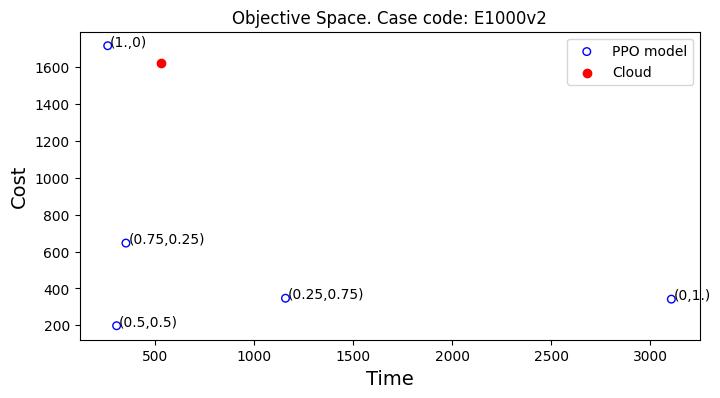

In [32]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30, facecolors='none', edgecolors='blue',label="PPO model")


ax.scatter(dfmodel.iTime[0],dfmodel.iCost[0],color="red",label="Cloud")

for i in range(len(avg_pf)):
    print((avg_pf[i,0], avg_pf[i,1]))
    ax.annotate(getWeithDecomposition(dfDRL.iloc[i].model), (avg_pf[i,0]+12, avg_pf[i,1]-2.5))
ax.legend()
plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# GA PF

In [33]:
## Experiment config
configs.name="E1000v9"
configs.n_devices=999
configs.n_jobs=9

In [34]:
df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df = pd.DataFrame(df)


In [35]:
df.columns = ["case","time","cost","executionTime"]
dfga = df[df.case==0]

In [36]:
df2 = pd.read_pickle('logs/log_ga_pf_'  + str("E1000v150") + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df2 = pd.DataFrame(df2)
df2.columns = ["case","time","cost","executionTime"]
dfga150 = df2[df2.case==0]

In [37]:
df3 = pd.read_pickle('logs/log_ga_pf_'  + str("E1000v200") + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df3 = pd.DataFrame(df3)
df3.columns = ["case","time","cost","executionTime"]
dfga200 = df3[df3.case==0]

In [38]:
df4 = pd.read_pickle('logs/log_ga_pf_'  + str("E1000v250") + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df4 = pd.DataFrame(df4)
df4.columns = ["case","time","cost","executionTime"]
dfga250 = df4[df4.case==0]

In [39]:
df5 = pd.read_pickle('logs/log_ga_pf_'  + str("E1000v300") + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df5 = pd.DataFrame(df5)
df5.columns = ["case","time","cost","executionTime"]
dfga300 = df5[df5.case==0]

In [40]:
df6 = pd.read_pickle('logs/log_ga_pf_'  + str("E1000v400") + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0.pkl', 'infer')
df6 = pd.DataFrame(df6)
df6.columns = ["case","time","cost","executionTime"]
dfga400 = df6[df6.case==0]

/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_51595/82532768.py:2: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(dfga.time, dfga.cost,       s=30,  marker="+", edgecolors='blue', label="NSGA-II: 100 generations")


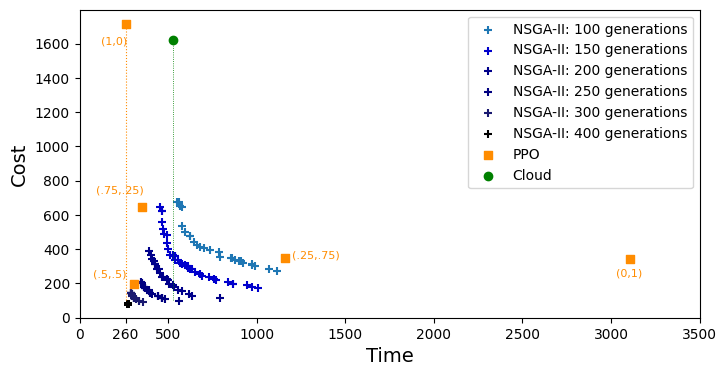

In [41]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost,       s=30,  marker="+", edgecolors='blue', label="NSGA-II: 100 generations")

ax.scatter(dfga150.time, dfga150.cost, s=30,  marker="+", color='mediumblue', label="NSGA-II: 150 generations")
ax.scatter(dfga200.time, dfga200.cost, s=30,  marker="+", color='darkblue', label="NSGA-II: 200 generations")
ax.scatter(dfga250.time, dfga250.cost, s=30,  marker="+", color='navy', label="NSGA-II: 250 generations")
ax.scatter(dfga300.time, dfga300.cost, s=30,  marker="+", color='midnightblue', label="NSGA-II: 300 generations")
ax.scatter(dfga400.time, dfga400.cost, s=30,  marker="+", color='black', label="NSGA-II: 400 generations")

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30,  marker="s", color='darkorange',label="PPO")

#ax.scatter(dfmodel.time, dfmodel.cost, s=30,  marker="s", edgecolors='darkorange',label="PPO: average cases")

ax.scatter(dfmodel.iTime[0],dfmodel.iCost[0],color="green",label="Cloud")

mlabel = ["(1,0)","(.75,.25)","(.5,.5)","(.25,.75)","(0,1)"]
for i in range(len(dfmodel)):
    if i in [0]:
        ax.annotate(mlabel[i], (avg_pf[i,0]-140, avg_pf[i,1]-120),color="darkorange",fontsize=8)
    elif i in [1]:
        ax.annotate(mlabel[i], (avg_pf[i,0]-260, avg_pf[i,1]+80),color="darkorange",fontsize=8)
    elif i in [2]:
        ax.annotate(mlabel[i], (avg_pf[i,0]-230, avg_pf[i,1]+40),color="darkorange",fontsize=8)
    elif i in [4]:
        ax.annotate(mlabel[i], (avg_pf[i,0]-80, avg_pf[i,1]-100),color="darkorange",fontsize=8)
    else:
        ax.annotate(mlabel[i], (avg_pf[i,0]+40, avg_pf[i,1]),color="darkorange",fontsize=8)

ax.legend()
ax.vlines(x=dfmodel.iTime[0], ymin=100, ymax=dfmodel.iCost[0], colors='green', ls=':', lw=0.6)
ax.vlines(x=avg_pf[0,0], ymin=100, ymax=avg_pf[0,1], colors='darkorange', ls=':', lw=0.8)
# plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.xticks(list(plt.xticks()[0]) + [avg_pf[0,0]])
plt.savefig("images/pf_ppo_nsgaII_c0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

# NSGAII + DRL

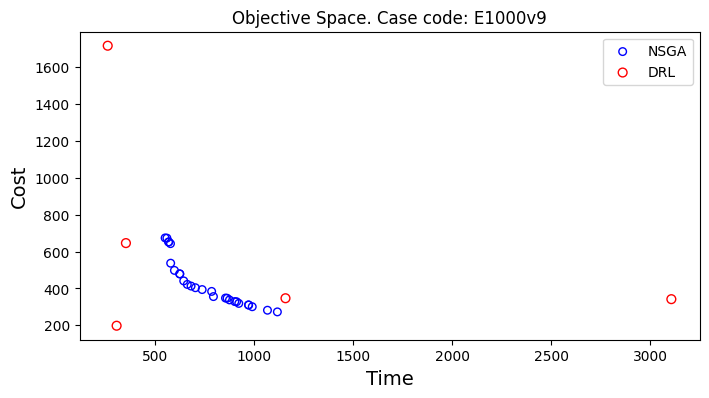

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(dfga.time, dfga.cost, s=30, facecolors='none', edgecolors='blue',label="NSGA")

ax.scatter(avg_pf[:,0], avg_pf[:,1], s=40, facecolors='none', edgecolors='red',label="DRL")

plt.title("Objective Space. Case code: %s"%configs.name)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.legend()
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [43]:
ga_pf = np.vstack((dfga.time.values,dfga.cost.values)).T

In [44]:
ref_point = np.array([900., 900.])
ind = HV(ref_point=ref_point)
print("H - GA ", ind(ga_pf)) 

H - GA  164877.0


In [45]:
print("H - DRL ", ind(avg_pf)) 

IndexError: index 2 is out of bounds for axis 0 with size 2

### Violin plot del PF según pesos del modelo DRL

In [ ]:
dtvio = dfDRL.loc[:,["model","time","cost"]]
dtvio["case"]=np.zeros(len(dtvio),dtype=int)
dtvio

,model,time,cost,case
0,1000,260.0,1716.0,0
30,7525,352.0,646.0,0
60,5050,305.0,198.0,0
90,2575,1158.0,347.0,0
120,0100,3107.0,342.0,0


In [ ]:
x = list(range(len(dtvio)))

In [ ]:
def getWeithDecomposition(val):
    if len(val)==3:
        if val[0]=="0":
            return "(0,1.)"
        else:
            return "(1.,0)"
    else:
        return "(.%s,.%s)"%(val[0],val[1])
    
fticks = np.vectorize(getWeithDecomposition)
ticks = fticks(dtvio.model)
ticks

array(['(.1,.0)', '(.7,.5)', '(.5,.0)', '(.2,.5)', '(.0,.1)'], dtype='<U7')

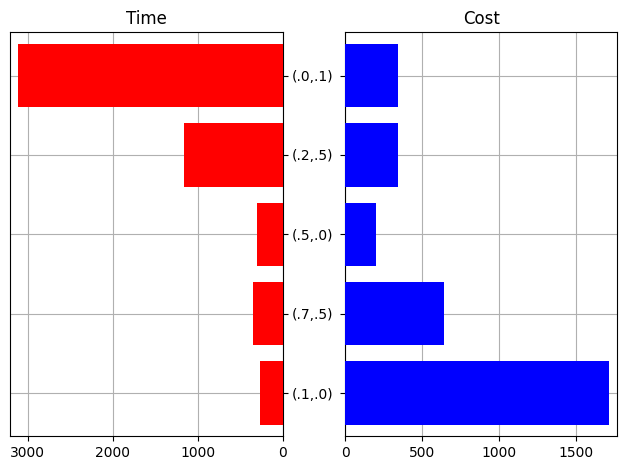

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dtvio.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dtvio.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

In [ ]:
dtvio.model

0      1000
50     7525
100    5050
150    2575
200    0100
Name: model, dtype: object

In [ ]:
dfmodel #average DRL all cases
print(dfmodel.index)

Index(['0100', '1000', '2575', '5050', '7525'], dtype='object', name='model')


In [ ]:
dfrindex = dfmodel.reindex(['010', '19', '28', '37', '46', '55', '64', '73', '82', '91', '100'])

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (11,) and arg 3 with shape (5,).

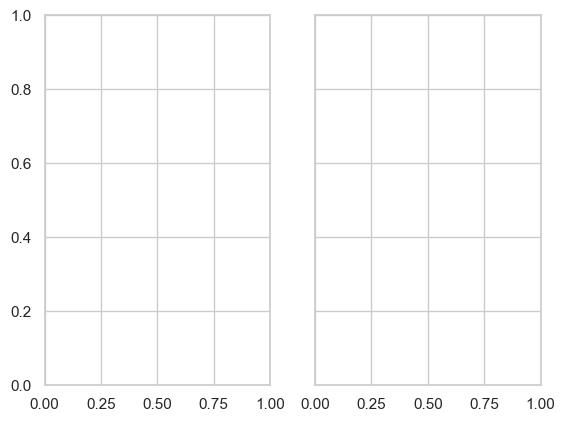

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(x, dfrindex.time, align='center', color='red', zorder=10)
axes[0].set(title='Time')
axes[1].barh(x, dfrindex.cost, align='center', color='blue', zorder=10)
axes[1].set(title='Cost')

axes[0].invert_xaxis()
axes[0].set(yticks=x, yticklabels=ticks)
axes[0].yaxis.tick_right()
axes[1].yaxis.tick_left()



for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.23)
plt.show()

# NSGAII -single objective

In [ ]:
weigthRange = list(np.arange(0,11,2.5))
combinationsWeightTC = list(zip(weigthRange,weigthRange[::-1])) #[(0, 10), (1, 9), (2, 8), (3, 7), (4, 6), (5, 5), (6, 4), (7, 3), (8, 2), (9, 1), (10, 0)]
allCombination = combinationsWeightTC
allCombination

combinations = ["0100","2575","5050","7525","1000"]
combinations


['0100', '2575', '5050', '7525', '1000']

In [ ]:
case = "1000v9v100"

In [ ]:
dall = pd.DataFrame([],columns= ["case","time","cost","constraing","exec","model"])
for combi in combinations:
    print("w%s"%combi)
    df = pd.read_pickle('logs/log_ga_mono_'  + str(case) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w%s.pkl'%combi, 'infer')
    df = pd.DataFrame(df)
    df.columns = ["case","time","cost","constraing","exec"]
    df=df[:1]
    df["model"]=[combi]*len(df)
    print("\t",df.shape)
    dall = pd.concat([dall, df], axis=0)
    
dall.shape
dall.head()

w0100
	 (1, 6)
w2575
	 (1, 6)
w5050
	 (1, 6)
w7525
	 (1, 6)
w1000
	 (1, 6)


,case,time,cost,constraing,exec,model
0,0,2600.0,99.0,0,0 days 00:12:00,0100
0,0,761.0,289.0,0,0 days 00:12:23,2575
0,0,494.0,524.0,0,0 days 00:12:16,5050
0,0,359.0,1160.0,0,0 days 00:12:10,7525
0,0,304.0,1887.0,0,0 days 00:12:38,1000


In [ ]:
case = "1000v9v200"
dall200 = pd.DataFrame([],columns= ["case","time","cost","constraing","exec","model"])
for combi in combinations:
    print("w%s"%combi)
    df = pd.read_pickle('logs/log_ga_mono_'  + str(case) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w%s.pkl'%combi, 'infer')
    df = pd.DataFrame(df)
    df.columns = ["case","time","cost","constraing","exec"]
    df=df[:1]
    df["model"]=[combi]*len(df)
    print("\t",df.shape)
    dall200 = pd.concat([dall200, df], axis=0)
    
dall200.shape
dall200.head()

w0100
	 (1, 6)
w2575
	 (1, 6)
w5050
	 (1, 6)
w7525
	 (1, 6)
w1000
	 (1, 6)


,case,time,cost,constraing,exec,model
0,0,2760.0,81.0,0,0 days 00:22:10,0100
0,0,412.0,90.0,0,0 days 00:29:37,2575
0,0,295.0,198.0,0,0 days 00:28:57,5050
0,0,258.0,437.0,0,0 days 00:28:31,7525
0,0,250.0,1778.0,0,0 days 00:25:06,1000


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_9866/686277641.py:25: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(dfga.time, dfga.cost, s=30,  marker="+", edgecolors='blue', label="NSGA-II: 100 generations")


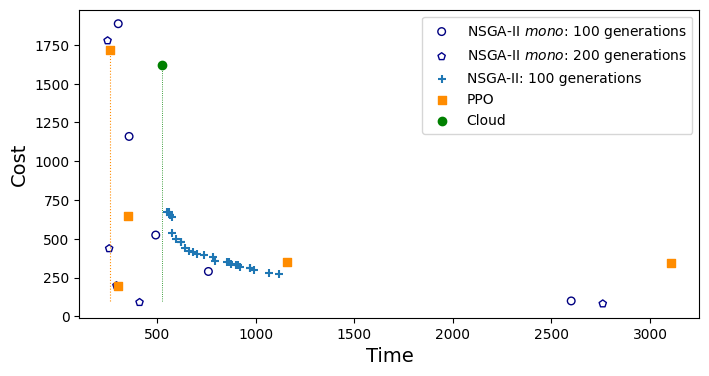

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dall.time, dall.cost, s=30, facecolors='none', color='navy', label="NSGA-II $mono$: 100 generations") #MONO solutions
ax.scatter(dall200.time, dall200.cost, s=30,  marker="p",facecolors='none', color='darkblue', label="NSGA-II $mono$: 200 generations") #MONO solutions

ax.scatter(dfga.time, dfga.cost, s=30,  marker="+", edgecolors='blue', label="NSGA-II: 100 generations")


ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30,  marker="s", color='darkorange',label="PPO")
ax.scatter(dfmodel.iTime[0],dfmodel.iCost[0],color="green",label="Cloud")

ax.vlines(x=dfmodel.iTime[0], ymin=100, ymax=dfmodel.iCost[0], colors='green', ls=':', lw=0.6)
ax.vlines(x=avg_pf[0,0], ymin=100, ymax=avg_pf[0,1], colors='darkorange', ls=':', lw=0.8)


ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.legend()
plt.savefig("images/mono_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()

In [ ]:
df = pd.read_pickle('logs/log_ga_pf_mono_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w5050.pkl', 'infer')
df = pd.DataFrame(df)
df.columns = ["case","time","cost","constraing","exec"]
df

,case,time,cost,constraing,exec
0,0,105.0,54.0,0,0 days 00:03:29
1,0,105.0,54.0,0,0 days 00:03:29
2,0,105.0,54.0,0,0 days 00:03:29
3,0,105.0,54.0,0,0 days 00:03:29
4,0,105.0,54.0,0,0 days 00:03:29
...,...,...,...,...,...
83,0,105.0,54.0,0,0 days 00:03:29
84,0,105.0,54.0,0,0 days 00:03:29
85,0,105.0,54.0,0,0 days 00:03:29
86,0,105.0,54.0,0,0 days 00:03:29


# GA 

In [ ]:
import pandas as pd
import numpy as np
combinations = ["010","27","55","72","100"]
case = "E1000v9" #HERE

dall = pd.DataFrame([],columns= ["case","time","cost","exec","model"])
for combi in combinations:
    print("w%s"%combi)
    df = pd.read_pickle('logs/llog_GA_'  + str(case) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'_0_w%s.pkl'%combi, 'infer')
    df = pd.DataFrame(df).T
    print(df)
    df.columns = ["case","time","cost","exec"]
    df=df[:1]
    df["model"]=[combi]*len(df)
    print("\t",df.shape)
    dall = pd.concat([dall, df], axis=0)
    
dall.shape
dall.head()


w010
   0       1     2               3
0  0  2874.0  99.0 0 days 02:24:40
	 (1, 5)
w27
   0      1      2               3
0  0  732.0  321.0 0 days 02:23:15
	 (1, 5)
w55
   0      1      2               3
0  0  456.0  586.0 0 days 02:26:05
	 (1, 5)
w72
   0      1      2               3
0  0  312.0  987.0 0 days 02:21:38
	 (1, 5)
w100
   0      1       2               3
0  0  283.0  1555.0 0 days 02:36:46
	 (1, 5)


,case,time,cost,exec,model
0,0,2874.0,99.0,0 days 02:24:40,010
0,0,732.0,321.0,0 days 02:23:15,27
0,0,456.0,586.0,0 days 02:26:05,55
0,0,312.0,987.0,0 days 02:21:38,72
0,0,283.0,1555.0,0 days 02:36:46,100


/var/folders/6j/7gfvt_29797dypw8t1wttblw0000gn/T/ipykernel_51595/3448456907.py:5: UserWarning: You passed a edgecolor/edgecolors ('blue') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(dfga.time, dfga.cost, s=30,  marker="+", edgecolors='blue', label="NSGA-II: 100 generations")


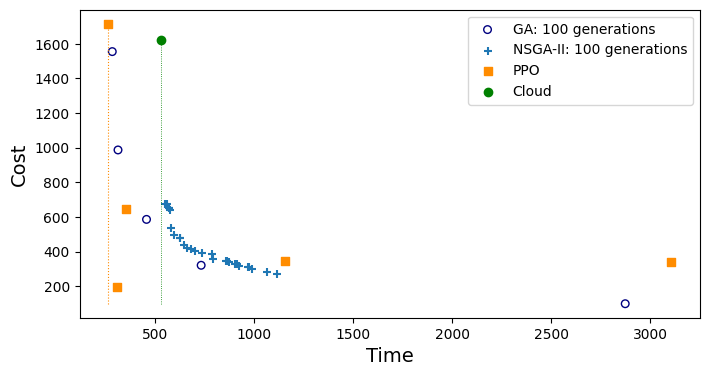

In [47]:
fig, ax = plt.subplots(figsize=(8,4))

ax.scatter(dall.time, dall.cost, s=30, facecolors='none', color='navy', label="GA: 100 generations") #MONO solutions

ax.scatter(dfga.time, dfga.cost, s=30,  marker="+", edgecolors='blue', label="NSGA-II: 100 generations")


ax.scatter(avg_pf[:,0], avg_pf[:,1], s=30,  marker="s", color='darkorange',label="PPO")
ax.scatter(dfmodel.iTime[0],dfmodel.iCost[0],color="green",label="Cloud")

ax.vlines(x=dfmodel.iTime[0], ymin=100, ymax=dfmodel.iCost[0], colors='green', ls=':', lw=0.6)
ax.vlines(x=avg_pf[0,0], ymin=100, ymax=avg_pf[0,1], colors='darkorange', ls=':', lw=0.8)


ax.set_xlabel("Time", fontsize=14)
ax.set_ylabel("Cost", fontsize=14)
ax.legend()
plt.savefig("images/ppo_ga_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()